In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib
matplotlib.style.use('ggplot')

##### reading the data files

In [3]:
diabetes = pd.read_csv("diabetic_data.csv")
id_mapping = pd.read_csv("IDs_mapping.csv")

#### dimensions of the data 

In [4]:
print(diabetes.shape)
print(id_mapping.shape)

(101766, 50)
(67, 2)


#### structure / data types of attributes

In [5]:
diabetes.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

#### Numerical attributes

In [6]:
diabetes_num_attr = diabetes.ix[:,['encounter_id','patient_nbr',
                                                'time_in_hospital','num_lab_procedures',
                                                'num_procedures','num_medications',
                                                'number_outpatient','number_emergency',
                                                'number_inpatient','number_diagnoses']]
diabetes_num_attr.dtypes

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


encounter_id          int64
patient_nbr           int64
time_in_hospital      int64
num_lab_procedures    int64
num_procedures        int64
num_medications       int64
number_outpatient     int64
number_emergency      int64
number_inpatient      int64
number_diagnoses      int64
dtype: object

#### Categorical attributes

In [7]:
diabetes_cat_attr = diabetes.ix[:,["race", "gender", "age", "admission_type_id", "discharge_disposition_id",
"admission_source_id", "payer_code", "medical_specialty", "diag_1", 
"diag_2", "diag_3", "max_glu_serum", "A1Cresult", "metformin", 
"repaglinide", "nateglinide", "chlorpropamide", "glimepiride", 
"acetohexamide", "glipizide", "glyburide", "tolbutamide", "pioglitazone", 
"rosiglitazone", "acarbose", "miglitol", "troglitazone", "tolazamide", 
"examide", "citoglipton", "insulin", "glyburide-metformin", "glipizide-metformin", 
"glimepiride-pioglitazone", "metformin-rosiglitazone", "metformin-pioglitazone", 
"change", "diabetesMed", "readmitted"]]

diabetes_cat_attr.dtypes

race                        object
gender                      object
age                         object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
payer_code                  object
medical_specialty           object
diag_1                      object
diag_2                      object
diag_3                      object
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide                   object
tolbutamide                 object
pioglitazone                object
rosiglitazone               object
acarbose                    object
miglitol                    object
troglitazone                object
tolazamide                  object
examide             

#### Changing type of attributes

In [8]:
for i in diabetes_cat_attr:
    diabetes_cat_attr[i] = diabetes_cat_attr[i].astype('category')

In [9]:
diabetes_cat_attr.dtypes

race                        category
gender                      category
age                         category
admission_type_id           category
discharge_disposition_id    category
admission_source_id         category
payer_code                  category
medical_specialty           category
diag_1                      category
diag_2                      category
diag_3                      category
max_glu_serum               category
A1Cresult                   category
metformin                   category
repaglinide                 category
nateglinide                 category
chlorpropamide              category
glimepiride                 category
acetohexamide               category
glipizide                   category
glyburide                   category
tolbutamide                 category
pioglitazone                category
rosiglitazone               category
acarbose                    category
miglitol                    category
troglitazone                category
t

In [10]:
for i in diabetes_num_attr :
    diabetes_num_attr[i] = diabetes_num_attr[i].astype(np.int64)

diabetes_num_attr.dtypes

encounter_id          int64
patient_nbr           int64
time_in_hospital      int64
num_lab_procedures    int64
num_procedures        int64
num_medications       int64
number_outpatient     int64
number_emergency      int64
number_inpatient      int64
number_diagnoses      int64
dtype: object

#### Categories for all the categorical values

In [11]:
for i in diabetes_cat_attr:
    i = pd.crosstab(diabetes_cat_attr[i],columns="count")
    print(i)

col_0            count
race                  
?                 2273
AfricanAmerican  19210
Asian              641
Caucasian        76099
Hispanic          2037
Other             1506
col_0            count
gender                
Female           54708
Male             47055
Unknown/Invalid      3
col_0     count
age            
[0-10)      161
[10-20)     691
[20-30)    1657
[30-40)    3775
[40-50)    9685
[50-60)   17256
[60-70)   22483
[70-80)   26068
[80-90)   17197
[90-100)   2793
col_0              count
admission_type_id       
1                  53990
2                  18480
3                  18869
4                     10
5                   4785
6                   5291
7                     21
8                    320
col_0                     count
discharge_disposition_id       
1                         60234
2                          2128
3                         13954
4                           815
5                          1184
6                         12902
7  

col_0      count
metformin       
Down         575
No         81778
Steady     18346
Up          1067
col_0         count
repaglinide        
Down             45
No           100227
Steady         1384
Up              110
col_0         count
nateglinide        
Down             11
No           101063
Steady          668
Up               24
col_0            count
chlorpropamide        
Down                 1
No              101680
Steady              79
Up                   6
col_0        count
glimepiride       
Down           194
No           96575
Steady        4670
Up             327
col_0           count
acetohexamide        
No             101765
Steady              1
col_0      count
glipizide       
Down         560
No         89080
Steady     11356
Up           770
col_0      count
glyburide       
Down         564
No         91116
Steady      9274
Up           812
col_0         count
tolbutamide        
No           101743
Steady           23
col_0         count
pioglitazone  

In [12]:
a = [diabetes_num_attr,diabetes.weight,diabetes_cat_attr]

diabetes_new = pd.concat(a,axis=1)
print(diabetes_new.shape)
print(diabetes_new.dtypes)

(101766, 50)
encounter_id                   int64
patient_nbr                    int64
time_in_hospital               int64
num_lab_procedures             int64
num_procedures                 int64
num_medications                int64
number_outpatient              int64
number_emergency               int64
number_inpatient               int64
number_diagnoses               int64
weight                        object
race                        category
gender                      category
age                         category
admission_type_id           category
discharge_disposition_id    category
admission_source_id         category
payer_code                  category
medical_specialty           category
diag_1                      category
diag_2                      category
diag_3                      category
max_glu_serum               category
A1Cresult                   category
metformin                   category
repaglinide                 category
nateglinide              

#### Correlation table

In [13]:
cor = diabetes_num_attr.corr()
cor

,encounter_id,patient_nbr,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
encounter_id,1.000000,0.512028,-0.062221,-0.026062,-0.014225,0.076113,0.103756,0.082803,0.030962,0.265149
patient_nbr,0.512028,1.000000,-0.024092,0.015946,-0.015570,0.020665,0.103379,0.062352,0.012480,0.226847
time_in_hospital,-0.062221,-0.024092,1.000000,0.318450,0.191472,0.466135,-0.008916,-0.009681,0.073623,0.220186
num_lab_procedures,-0.026062,0.015946,0.318450,1.000000,0.058066,0.268161,-0.007602,-0.002279,0.039231,0.152773
num_procedures,-0.014225,-0.015570,0.191472,0.058066,1.000000,0.385767,-0.024819,-0.038179,-0.066236,0.073734
num_medications,0.076113,0.020665,0.466135,0.268161,0.385767,1.000000,0.045197,0.013180,0.064194,0.261526
number_outpatient,0.103756,0.103379,-0.008916,-0.007602,-0.024819,0.045197,1.000000,0.091459,0.107338,0.094152
number_emergency,0.082803,0.062352,-0.009681,-0.002279,-0.038179,0.013180,0.091459,1.000000,0.266559,0.055539
number_inpatient,0.030962,0.012480,0.073623,0.039231,-0.066236,0.064194,0.107338,0.266559,1.000000,0.104710
number_diagnoses,0.265149,0.226847,0.220186,0.152773,0.073734,0.261526,0.094152,0.055539,0.104710,1.000000


#### Correlation Plot

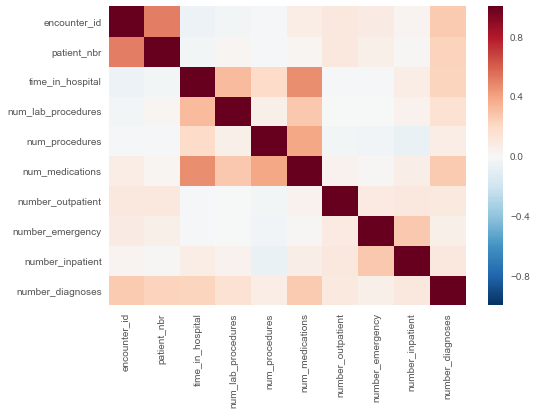

In [14]:
sns.heatmap(cor)

#### Checking for missing values

In [15]:
diabetes_new.isnull().sum()

encounter_id                0
patient_nbr                 0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
number_diagnoses            0
weight                      0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
payer_code                  0
medical_specialty           0
diag_1                      0
diag_2                      0
diag_3                      0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

#### Replacing "?" with NAN

In [16]:
a = ['race','payer_code','weight','medical_specialty','diag_1','diag_2','diag_3']

for i in a :
    diabetes_new[i] = diabetes_new[i].replace("?",np.NAN)

In [17]:
diabetes_new.gender = diabetes_new.gender.replace("Unknown/Invalid",np.NAN)

In [18]:
diabetes_new.isnull().sum()

encounter_id                    0
patient_nbr                     0
time_in_hospital                0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
number_diagnoses                0
weight                      98569
race                         2273
gender                          3
age                             0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
payer_code                  40256
medical_specialty           49949
diag_1                         21
diag_2                        358
diag_3                       1423
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

#### Plots Of Numerical attributes

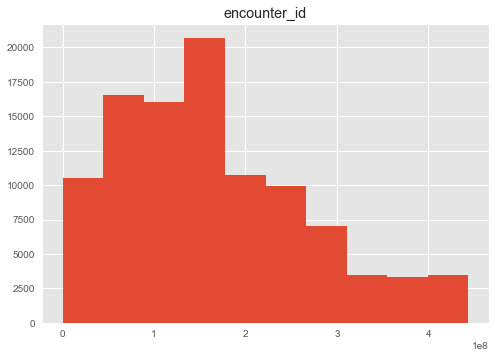

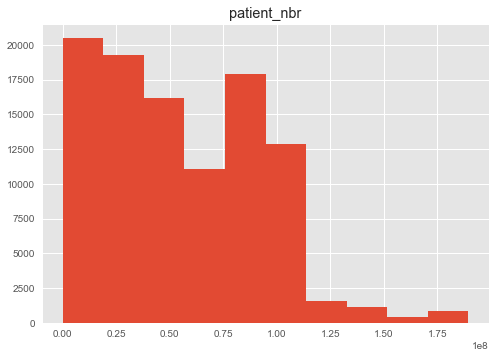

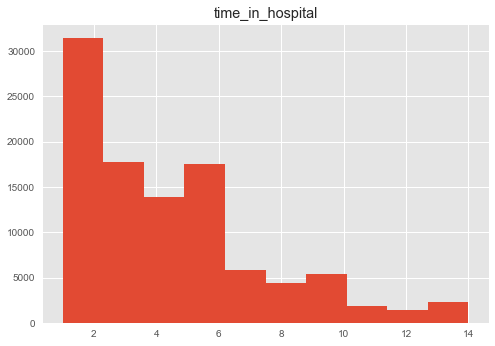

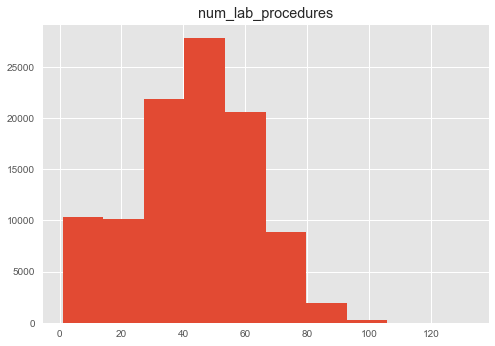

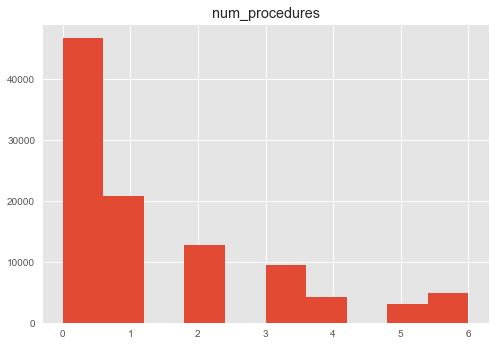

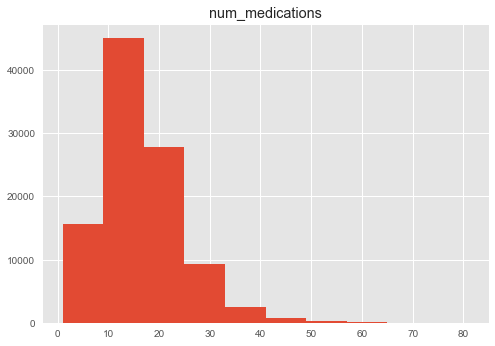

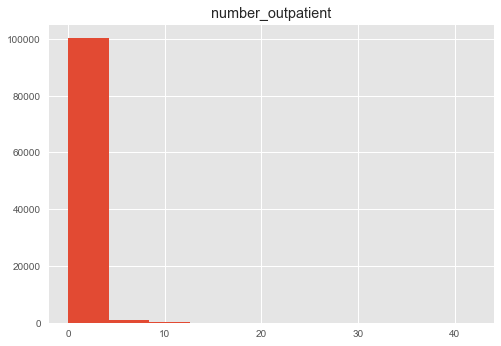

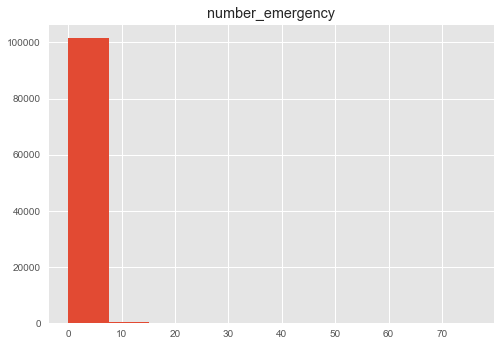

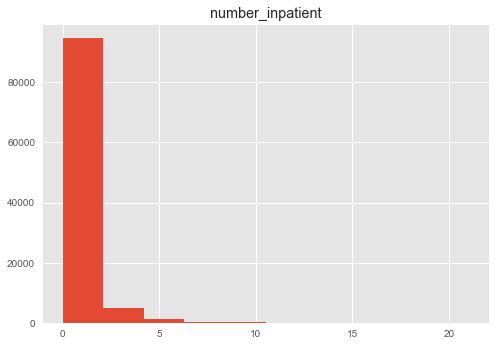

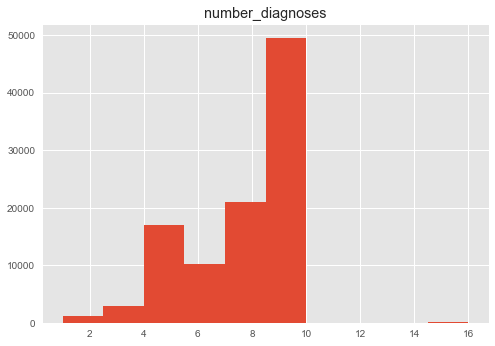

In [19]:
for i in diabetes_num_attr:
    diabetes_new.hist(i)

#### Plots of Categorical attributes

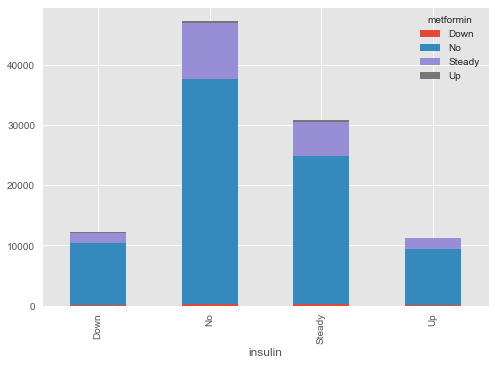

In [20]:
d = [diabetes_new.insulin,diabetes_new.metformin]

ds = pd.concat(d,axis = 1)
q = pd.crosstab(index=ds.insulin,columns=ds.metformin)
q.plot(kind='bar',stacked=True)

C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


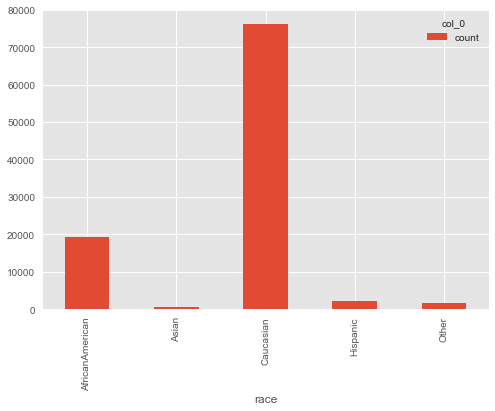

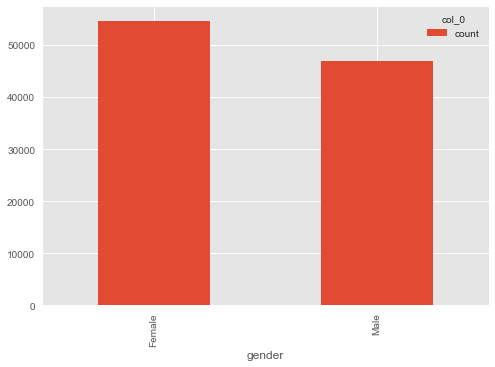

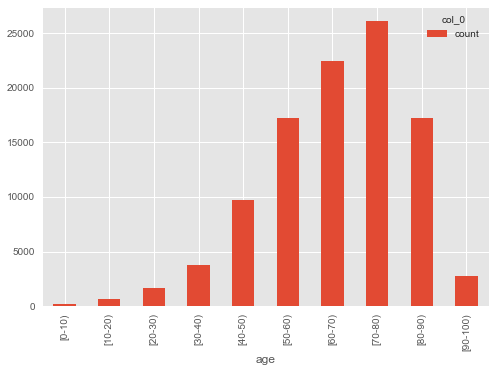

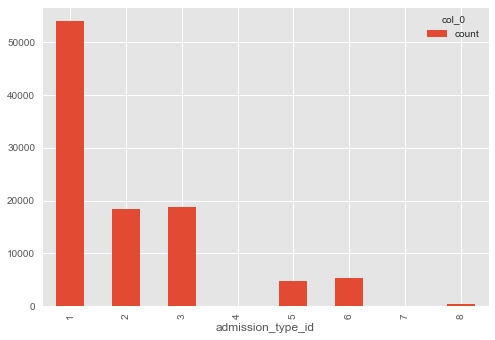

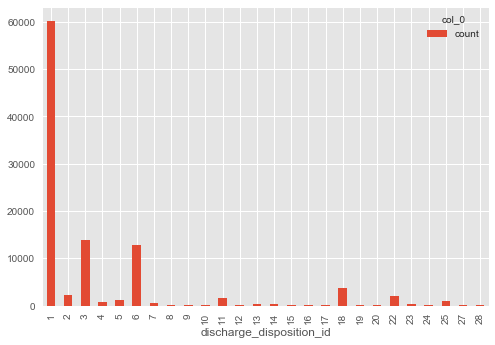

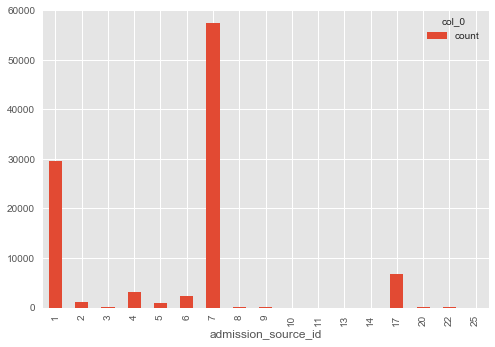

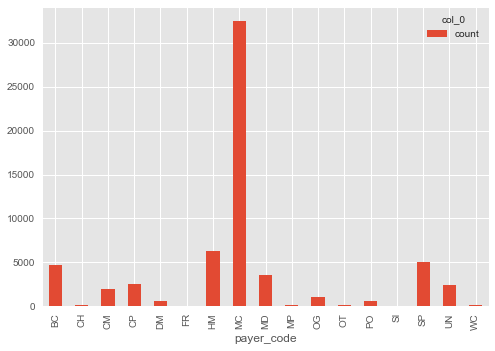

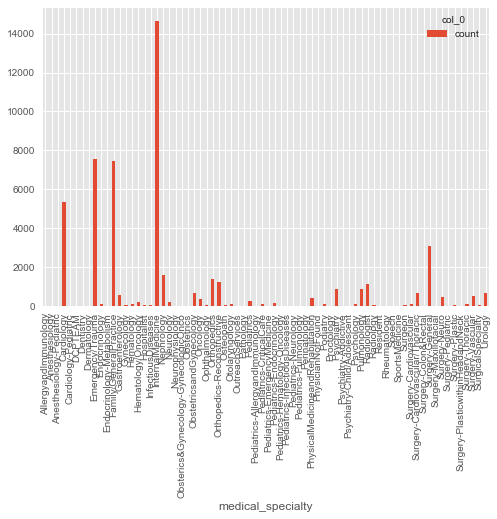

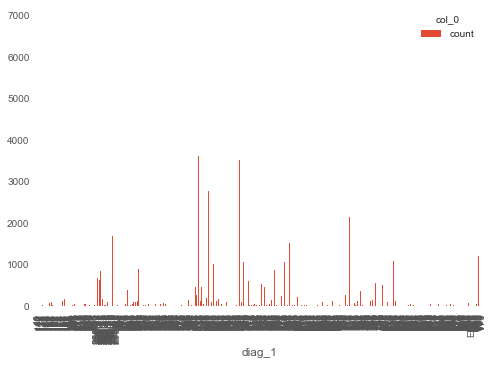

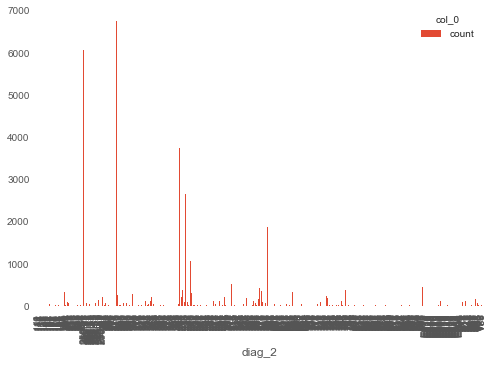

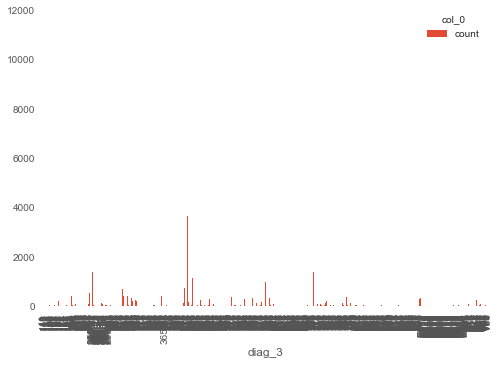

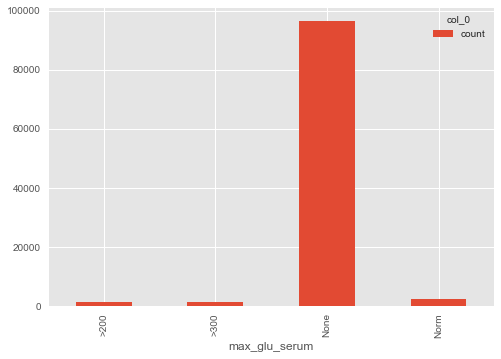

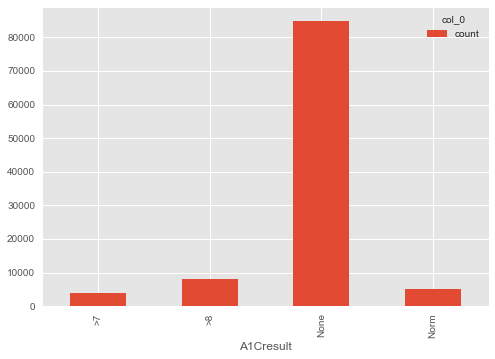

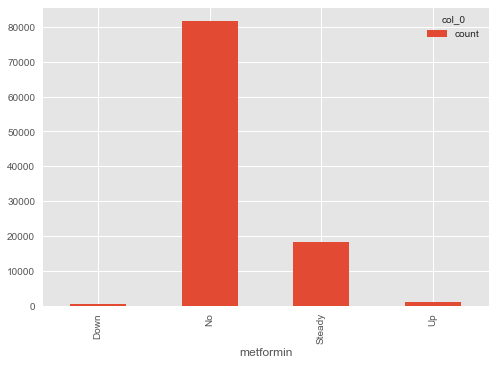

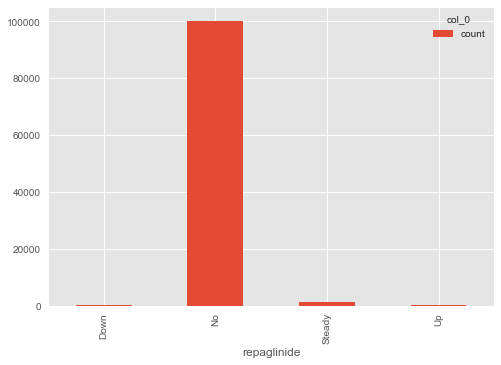

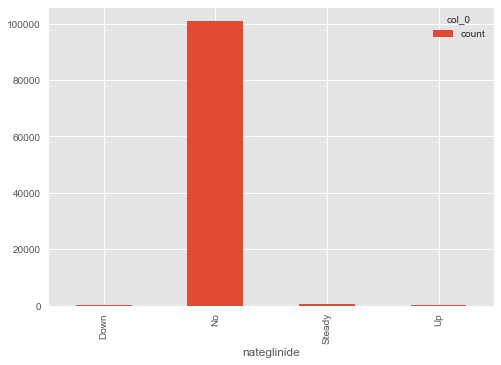

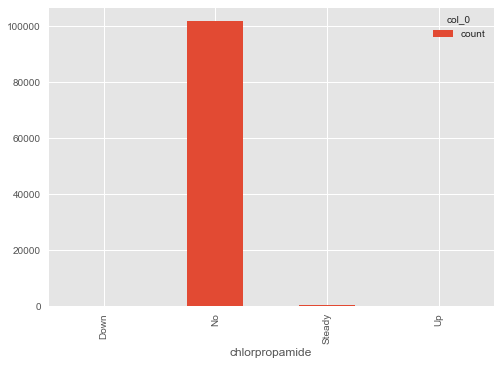

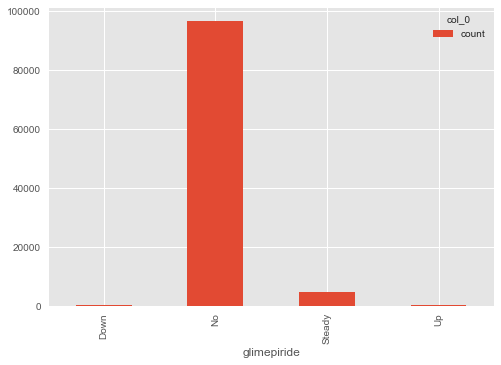

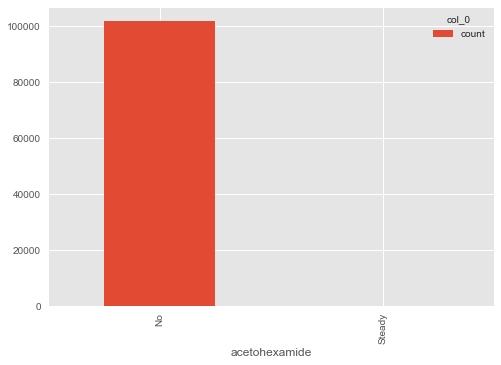

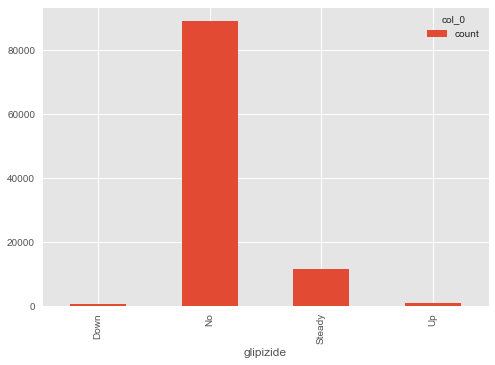

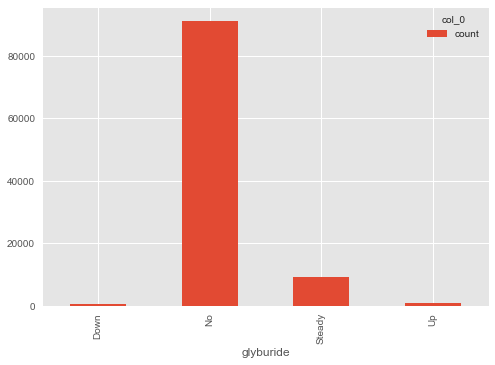

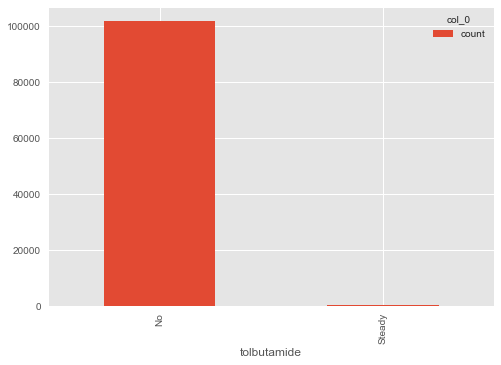

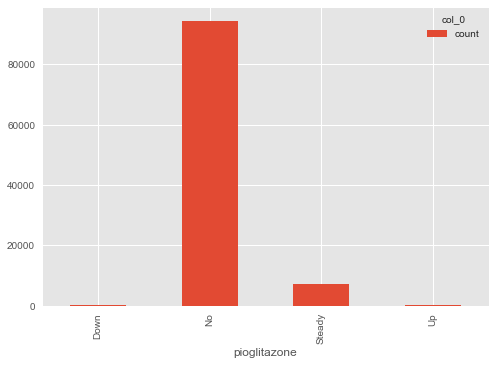

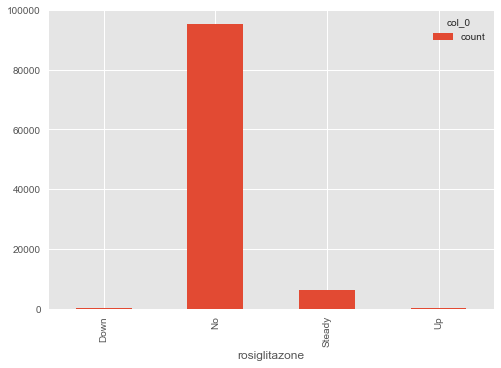

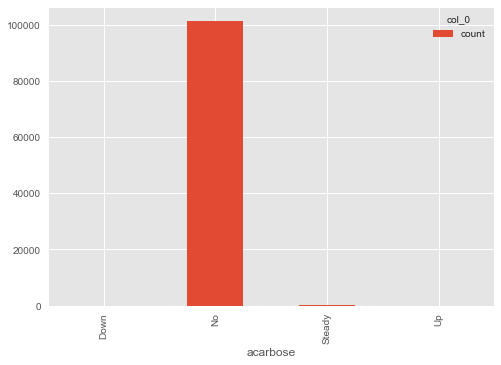

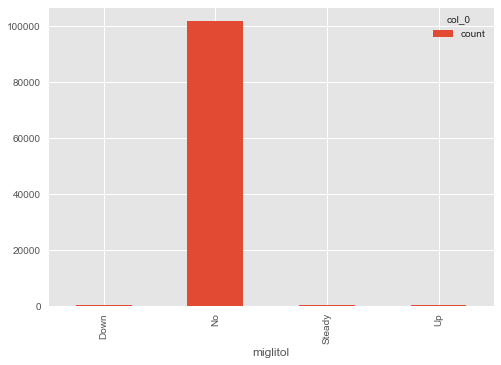

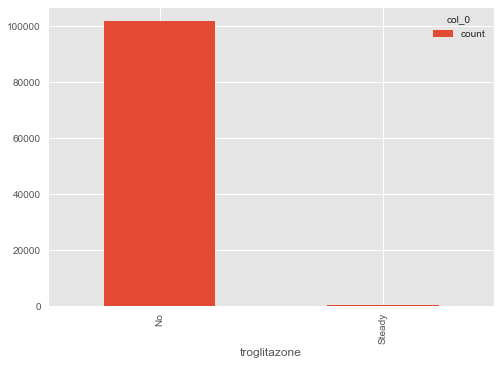

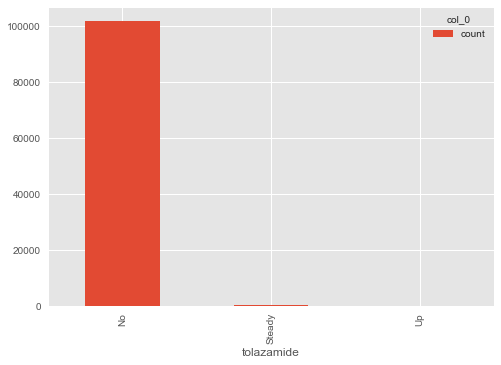

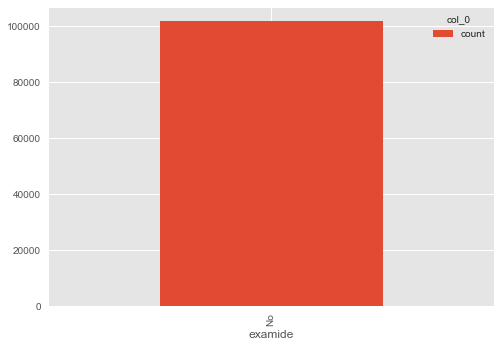

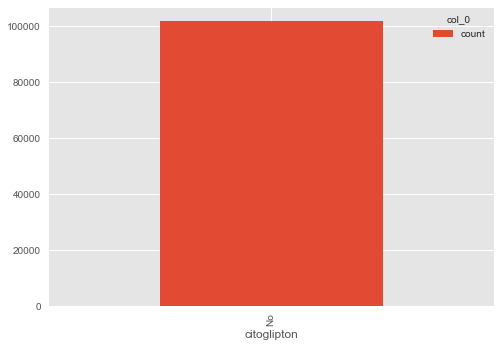

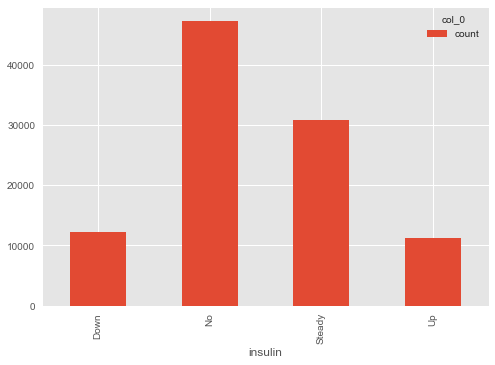

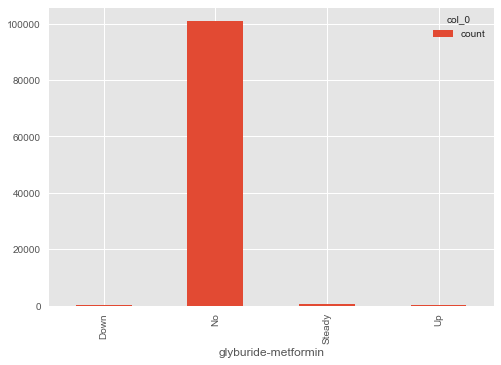

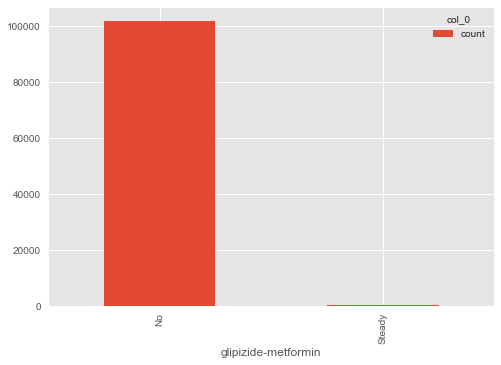

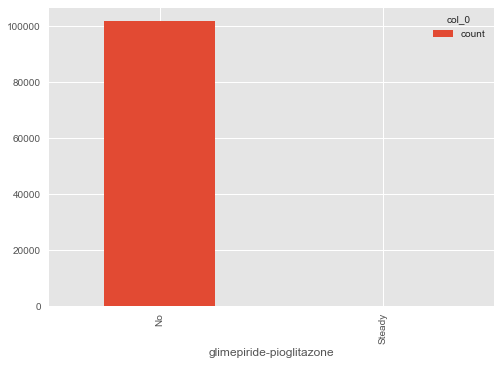

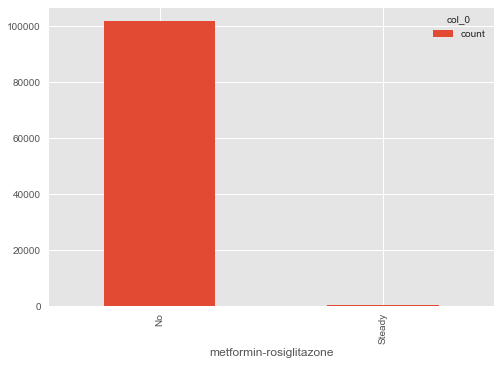

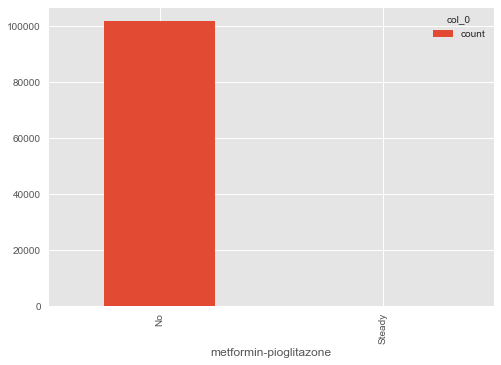

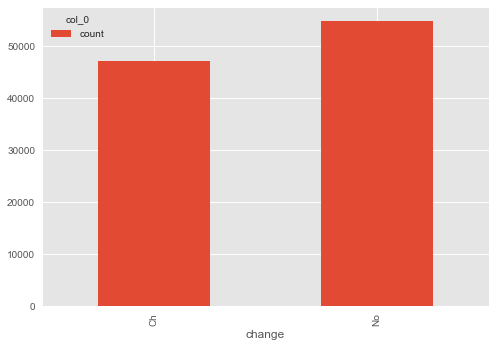

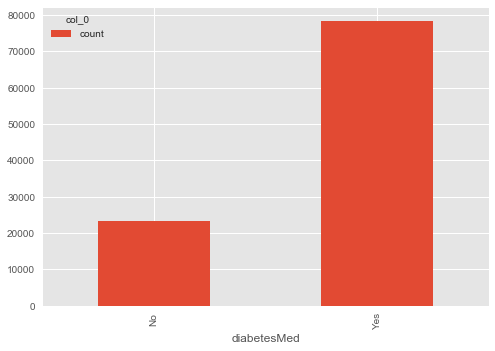

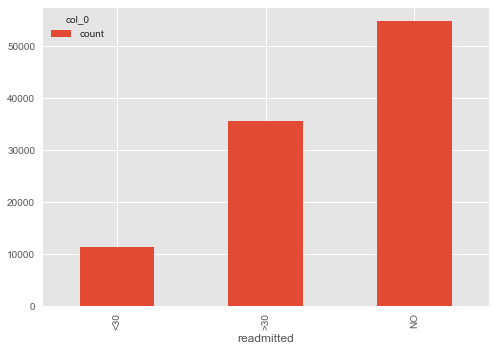

In [42]:
for i in diabetes_cat_attr:
     pd.crosstab(index = diabetes_new[i],columns="count").plot(kind="bar")
    

In [22]:
for i in diabetes_cat_attr:
    diabetes_new[i] = diabetes_new[i].cat.remove_unused_categories()

In [23]:
for i in diabetes_cat_attr:
    print(pd.crosstab(index=diabetes_new[i],columns='count'))
    print("\n")

col_0            count
race                  
AfricanAmerican  19210
Asian              641
Caucasian        76099
Hispanic          2037
Other             1506


col_0   count
gender       
Female  54708
Male    47055


col_0     count
age            
[0-10)      161
[10-20)     691
[20-30)    1657
[30-40)    3775
[40-50)    9685
[50-60)   17256
[60-70)   22483
[70-80)   26068
[80-90)   17197
[90-100)   2793


col_0              count
admission_type_id       
1                  53990
2                  18480
3                  18869
4                     10
5                   4785
6                   5291
7                     21
8                    320


col_0                     count
discharge_disposition_id       
1                         60234
2                          2128
3                         13954
4                           815
5                          1184
6                         12902
7                           623
8                           108
9            

col_0      count
glyburide       
Down         564
No         91116
Steady      9274
Up           812


col_0         count
tolbutamide        
No           101743
Steady           23


col_0         count
pioglitazone       
Down            118
No            94438
Steady         6976
Up              234


col_0          count
rosiglitazone       
Down              87
No             95401
Steady          6100
Up               178


col_0      count
acarbose        
Down           3
No        101458
Steady       295
Up            10


col_0      count
miglitol        
Down           5
No        101728
Steady        31
Up             2


col_0          count
troglitazone        
No            101763
Steady             3


col_0        count
tolazamide        
No          101727
Steady          38
Up               1


col_0     count
examide        
No       101766


col_0         count
citoglipton        
No           101766


col_0    count
insulin       
Down     12218
No       47383
S

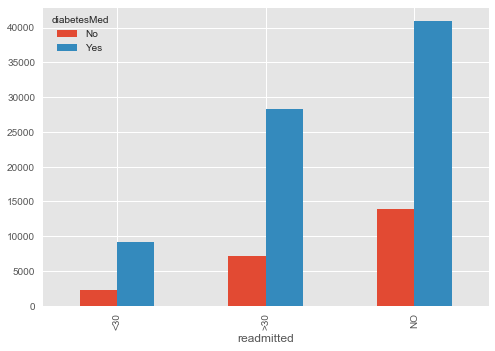

In [24]:
re_dia = [diabetes_new.readmitted,diabetes_new.diabetesMed]

re_dia = pd.concat(re_dia,axis = 1)

pd.crosstab(index = re_dia.readmitted,columns= re_dia.diabetesMed).plot(kind="bar")

In [41]:
for i in range(0,10,2):
    print(i)


0
2
4
6
8
